In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [8]:
np.random.seed(42)

date_range = pd.date_range(start='2020-01-01', periods=365, freq='D')

trend = np.linspace(0, 10, 365) 
seasonality = 5 * np.sin(2 * np.pi * np.arange(365) / 365 * 30) 
noise = np.random.normal(0, 2, 365)  

temperature = trend + seasonality + noise

df = pd.DataFrame({'Date': date_range, 'Temp': temperature})

df.set_index('Date', inplace=True)

In [9]:
df

,Temp
Date,
2020-01-01,0.993428
2020-01-02,2.219822
2020-01-03,5.644142
2020-01-04,8.127320
2020-01-05,4.041644
...,...
2020-12-26,8.275153
2020-12-27,8.582999
2020-12-28,4.728692


<Axes: title={'center': 'Daily Minimum Temperature'}, xlabel='Date', ylabel='Temperature(C)'>

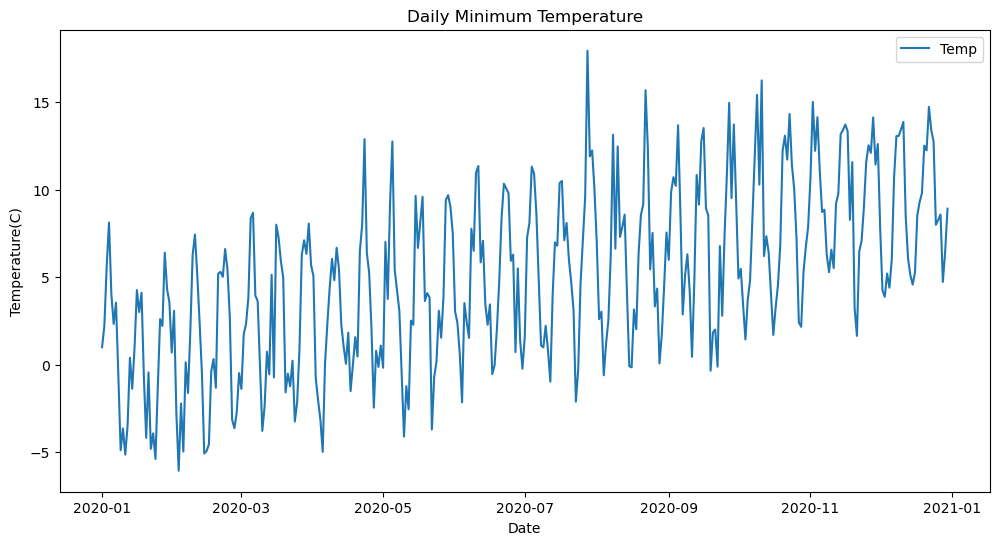

In [10]:
plt.figure(figsize=(12,6))
plt.title('Daily Minimum Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature(C)')
sns.lineplot(df)

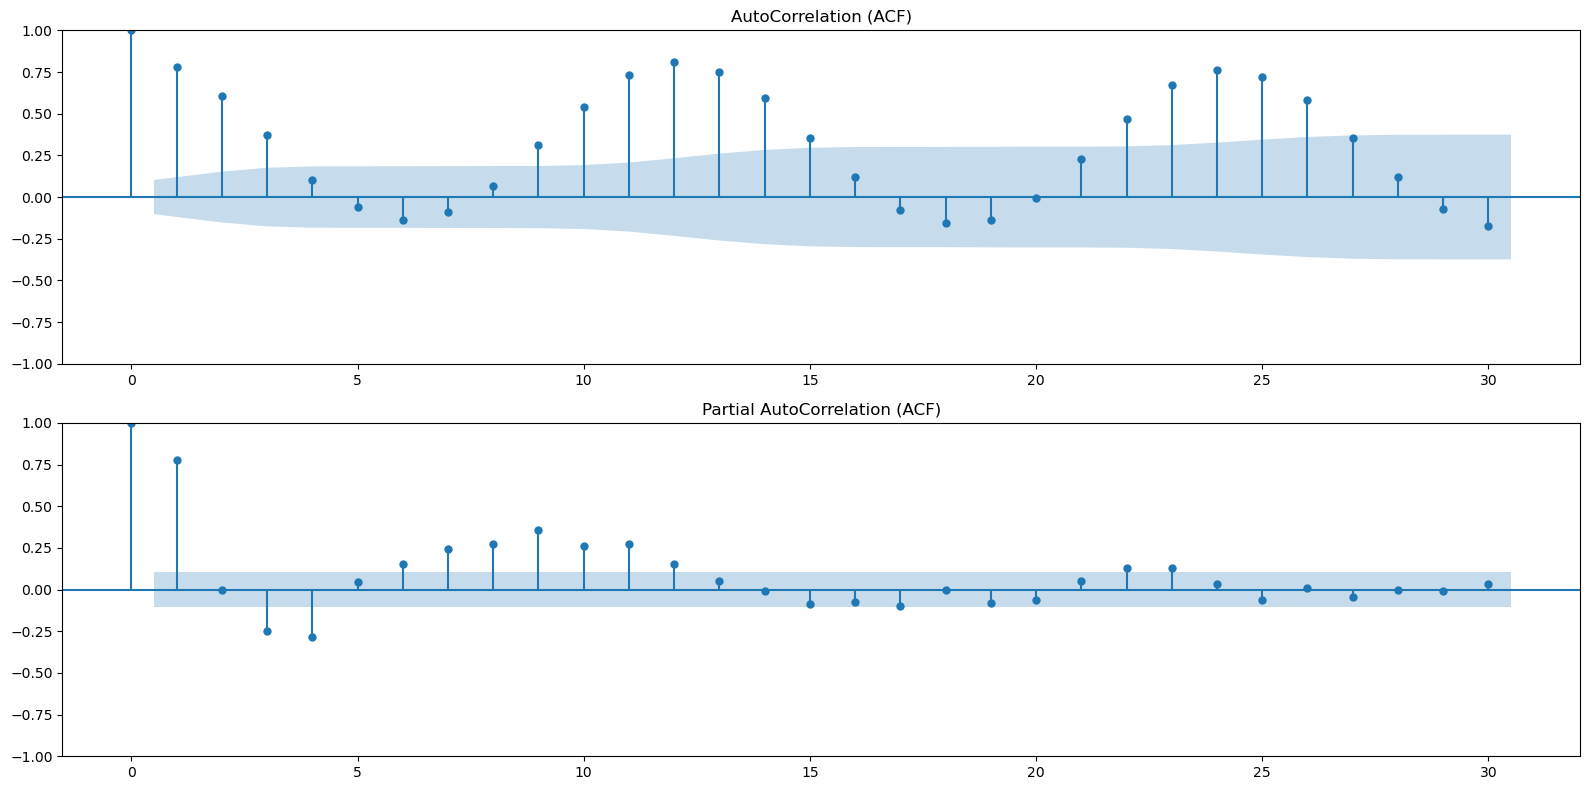

In [11]:
fig,axes = plt.subplots(2,1,figsize=(16,8))
plot_acf(df['Temp'],lags=30,ax=axes[0],title='AutoCorrelation (ACF)')
plot_pacf(df['Temp'],lags=30,ax=axes[1],title='Partial AutoCorrelation (ACF)')
plt.tight_layout()
plt.show()